# Introduction

**Cet exercice a initialement été fait lors d'une séance de travaux dirigé pendant ma deuxième année de master. L'exercice avais été fait sur matlab et j'ai décidé de le refaire en python pour m'entrainer et me familiariser avec les differentes bibliothèques de machine learning.**

**L'objectif du projet est de creer un modèle de réseaux de neurones capable de prédire le débit d'une rivière, dans notre cas, la rivière du Têt. La rivière étant un bassin versant , elle est alimentée et impactée par la pluviométrie des villes alentours (littoral, lac, terres humides,etc) a savoir : Le Soler, Vinça, Thuir et Canohès.**


**Les mesures de pluviométrie des villes et du débit moyen de la rivière ont été recueillis tout les jours pendant une année. Nous allons donc nous servir de ces données en les séparant afin de pouvoir entrainer et valider notre modèle neuronal. 
L'objectif est donc de prédire le débit moyen du fleuve en fonction du mois et de la pluviométrie des différentes villes.**

**Le fichier de données dont nous disposons est un fichier texte(.txt) composé de 365 lignes et 6 colonnes où chaque ligne répresente à une mesure faite sur differents lieux.**

Voici comment sont définis les différentes étapes de notre projet :
1. Chargement des librairies et des données
2. Visualisation et traitement des données 
  *   2.1 Traiter les données de tel sorte a n'avoir que des données utiles
  *   2.2 Normalisation des données

3. Séparation des données en deux catégorie : entrainement et validation
4. Création du modèle neuronal
5. Entrainement du modèle
6. Validation du modèle
7. Comparaison des modèles/ calcul du taux d'erreur final

# 1. Chargement des données et des librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

import math
from sklearn.metrics import mean_squared_error

pluie = np.loadtxt('mesures_pluie.txt')

# 2.1 Traitement des données

**Le fichier de données dont nous disposons est un fichier texte(.txt)**

In [3]:
print("la taille du tableau des mesures initiales est :{}".format(pluie.shape))

la taille du tableau des mesures initiales est :(365, 6)


**Afin de mieux pouvoir manipuler les données, j'ai créer un DataFrame.**

**Nous avons donc un tableau composé de 365 lignes et 6 colonnes réprésentant le mois et les villes où ont été faite les mesures. La dernière colonne représente le débit moyen de la rivière.**


In [4]:
df1 = pd.DataFrame(pluie)
#df1.columns = ['Mois','Soler','Vinça','Thuir','Canohes','Debit moyen']
col_names = ['Mois','Soler','Vinça','Thuir','Canohes','Debit moyen']
df1.columns = col_names
df1.index.name = 'Jours'
print(df1.head(20))

       Mois  Soler  Vinça  Thuir  Canohes  Debit moyen
Jours                                                 
0       1.0    0.0    0.0    0.0      0.0        0.854
1       1.0    0.0    0.0    0.0      0.0        1.370
2       1.0    5.0   10.0   20.0     10.0        2.260
3       1.0   28.0   15.0    0.0      5.0        2.120
4       1.0    0.0    0.0    0.0      0.0        2.120
5       1.0    0.0    0.0    0.0      0.0        2.150
6       1.0    0.0    0.0    0.0      0.0        2.520
7       1.0    0.0    0.0    0.0      0.0        2.390
8       1.0    0.0    0.0    0.0      0.0        2.410
9       1.0   50.0   10.0   29.0      0.0        2.460
10      1.0   14.0   10.0    0.0      0.0        2.270
11      1.0   10.0    0.0   14.0      0.0        2.170
12      1.0    4.0    5.0    0.0      0.0        2.110
13      1.0    0.0    0.0    0.0      0.0        2.060
14      1.0    0.0    0.0    0.0      5.0        2.200
15      1.0    0.0    0.0    0.0      5.0        0.956
16      1.

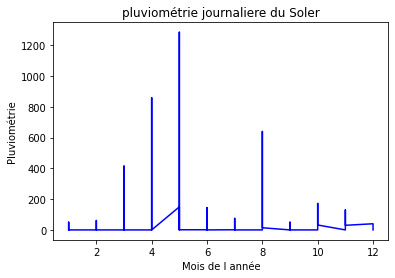

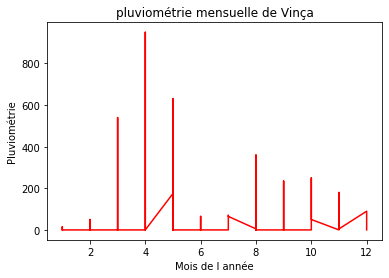

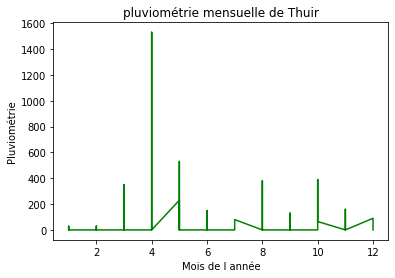

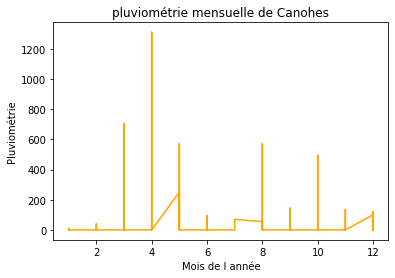

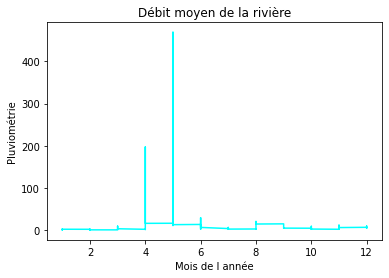

In [5]:

plt.plot(df1['Mois'],df1['Soler'],color= 'blue')
plt.title('pluviométrie journaliere du Soler')
plt.xlabel('Mois de l année')
plt.ylabel('Pluviométrie')
plt.show()

plt.plot(df1['Mois'],df1['Vinça'], color= 'red')
plt.title('pluviométrie mensuelle de Vinça')
plt.xlabel('Mois de l année')
plt.ylabel('Pluviométrie')
plt.show()

plt.plot(df1['Mois'],df1['Thuir'], color= 'green')
plt.title('pluviométrie mensuelle de Thuir')
plt.xlabel('Mois de l année')
plt.ylabel('Pluviométrie')
plt.show()

plt.plot(df1['Mois'],df1['Canohes'], color= 'orange')
plt.title('pluviométrie mensuelle de Canohes')
plt.xlabel('Mois de l année')
plt.ylabel('Pluviométrie')
plt.show()

plt.plot(df1['Mois'],df1['Debit moyen'], color= 'cyan')
plt.title('Débit moyen de la rivière')
plt.xlabel('Mois de l année')
plt.ylabel('Pluviométrie')
plt.show()


In [6]:
# plt.figure(1)
# plt.subplot(221)
# # plt.title('pluviométrie journaliere du Soler')
# # plt.xlabel('Mois de l année')
# # plt.ylabel('Pluviométrie')
# # plt.legend()
# plt.plot(df1['Mois'],df1['Soler'])

# plt.subplot(222)
# plt.plot(df1['Mois'],df1['Vinça'])


# plt.subplot(223)
# plt.plot(df1['Mois'],df1['Thuir'])


# plt.subplot(224)
# plt.plot(df1['Mois'],df1['Canohes'])

**Un phénomène pluvieux est caractérisé par la somme non nulle des pluviométrie des 4 villes.**
**Ici par exemple , on peut voir que les deux premières lignes ne montre pas de phénomènes pluvieux. La pluviométrie du Soler, de Vinça, de Thuir et Canohès n'affectent en aucun cas le débit moyen de la rivière.**

**Ces lignes n'étant donc pas utiles pour l'apprentissage de notre réseaux de neurones , il est donc préférable de les supprimer.**


In [7]:
print(df1.head(5))

       Mois  Soler  Vinça  Thuir  Canohes  Debit moyen
Jours                                                 
0       1.0    0.0    0.0    0.0      0.0        0.854
1       1.0    0.0    0.0    0.0      0.0        1.370
2       1.0    5.0   10.0   20.0     10.0        2.260
3       1.0   28.0   15.0    0.0      5.0        2.120
4       1.0    0.0    0.0    0.0      0.0        2.120


In [8]:
#---Création d'un masque n'affichant que les phénomènes pluvieux 
sup_zero = (
    (df1['Soler'] + df1['Vinça'] + df1['Thuir'] + df1['Canohes'])>0
)
df2 = df1[sup_zero]
print(f"Dimensions du dataframe apres filtrage: {df2.shape}\n")
print(df2.head(20))

Dimensions du dataframe apres filtrage: (137, 6)

       Mois  Soler  Vinça  Thuir  Canohes  Debit moyen
Jours                                                 
2       1.0    5.0   10.0   20.0     10.0        2.260
3       1.0   28.0   15.0    0.0      5.0        2.120
9       1.0   50.0   10.0   29.0      0.0        2.460
10      1.0   14.0   10.0    0.0      0.0        2.270
11      1.0   10.0    0.0   14.0      0.0        2.170
12      1.0    4.0    5.0    0.0      0.0        2.110
14      1.0    0.0    0.0    0.0      5.0        2.200
15      1.0    0.0    0.0    0.0      5.0        0.956
19      1.0    7.0    0.0    0.0      0.0        1.010
22      1.0    0.0    0.0    0.0     10.0        0.972
34      2.0    0.0    0.0   30.0      0.0        1.480
35      2.0   59.0   50.0   20.0     40.0        1.770
36      2.0   14.0   20.0    0.0     30.0        2.130
43      2.0    1.0    0.0    0.0      0.0        0.810
46      2.0   10.0   30.0   30.0     35.0        1.220
47      2.0   1

**En filtrant nos données nous passons d'un tableau composés de 365 lignes, à un tableau composé de 137 lignes.**

# 2.2 Normalisation 

**Afin que notre réseau ne privilégie pas une grandeur par rapport à d'autres lors de la phase d'apprentissage, il est conseillé de normaliser les données entre 0 et 1.**

In [9]:
#----Code correct ----
df_norm=((df2-df2.min())/(df2.max()-df2.min()))
print(df_norm)

       Mois     Soler     Vinça     Thuir   Canohes  Debit moyen
Jours                                                           
2       0.0  0.003891  0.010526  0.013072  0.007634     0.003867
3       0.0  0.021790  0.015789  0.000000  0.003817     0.003568
9       0.0  0.038911  0.010526  0.018954  0.000000     0.004294
10      0.0  0.010895  0.010526  0.000000  0.000000     0.003889
11      0.0  0.007782  0.000000  0.009150  0.000000     0.003675
...     ...       ...       ...       ...       ...          ...
350     1.0  0.000778  0.000000  0.000000  0.000000     0.010569
355     1.0  0.001556  0.000000  0.000000  0.000000     0.015243
356     1.0  0.000778  0.000000  0.000000  0.000000     0.010035
361     1.0  0.000778  0.000000  0.000000  0.000000     0.008456
363     1.0  0.007004  0.000000  0.000000  0.000000     0.008413

[137 rows x 6 columns]


**Pour maximiser les résultats et éviter les phénomènes de sur-apprentissage il peut aussi être utile de mélanger l'odre chronologiques, l'ordre de présentation des données.**

In [10]:
#-------- mélange des différentes lignes du dataframe ------------
df_norm = df_norm.sample(frac = 1)
print(df_norm)

           Mois     Soler     Vinça     Thuir   Canohes  Debit moyen
Jours                                                               
170    0.454545  0.000000  0.026316  0.000000  0.000000     0.018017
282    0.818182  0.062257  0.031579  0.078431  0.152672     0.018273
309    0.909091  0.038911  0.063158  0.032680  0.061069     0.002992
11     0.000000  0.007782  0.000000  0.009150  0.000000     0.003675
294    0.818182  0.018677  0.010526  0.003268  0.003817     0.005937
...         ...       ...       ...       ...       ...          ...
289    0.818182  0.000778  0.000000  0.000000  0.000000     0.014901
155    0.454545  0.112840  0.047368  0.078431  0.072519     0.038527
63     0.181818  0.181323  0.568421  0.228758  0.538168     0.019042
216    0.636364  0.125292  0.189474  0.035948  0.061069     0.004443
332    0.909091  0.101167  0.000000  0.006536  0.003817     0.017249

[137 rows x 6 columns]


In [11]:
#----Ce code supprime les titres des colonnes du dataframe...pas optimal ----
# scaler = MinMaxScaler(feature_range=(0, 1))
# df2_norm_test = scaler.fit_transform(df2)
# print(f"Shape de df2 normalisé: {df2_norm.shape}\n")
# print(df2_norm_test[0:12,:])

# 3. Separation des données

**Cette partie consiste tout simplement a séparer les données. Une partie servira a la phase d'entraînement et l'autre a la phase de validation.**<br>
**De manière générale 80% des données sont utilisés pour la phase d'entrainement et 20% pour la phase de validation.**

In [12]:
print(df_norm.shape[0])
taille_train = int(round(df_norm.shape[0]*0.80))
taille_test = int(round(df_norm.shape[0]*0.20))
print(f"La tailles des données d'entrainement est :{taille_train}")
print(f"La tailles des données de test est :{taille_test}")

137
La tailles des données d'entrainement est :110
La tailles des données de test est :27


In [13]:
data = df_norm.copy()
print(f"df norm head:\n{df_norm.head(5)}\n")
print(data.iloc[0:5])

df norm head:
           Mois     Soler     Vinça     Thuir   Canohes  Debit moyen
Jours                                                               
170    0.454545  0.000000  0.026316  0.000000  0.000000     0.018017
282    0.818182  0.062257  0.031579  0.078431  0.152672     0.018273
309    0.909091  0.038911  0.063158  0.032680  0.061069     0.002992
11     0.000000  0.007782  0.000000  0.009150  0.000000     0.003675
294    0.818182  0.018677  0.010526  0.003268  0.003817     0.005937

           Mois     Soler     Vinça     Thuir   Canohes  Debit moyen
Jours                                                               
170    0.454545  0.000000  0.026316  0.000000  0.000000     0.018017
282    0.818182  0.062257  0.031579  0.078431  0.152672     0.018273
309    0.909091  0.038911  0.063158  0.032680  0.061069     0.002992
11     0.000000  0.007782  0.000000  0.009150  0.000000     0.003675
294    0.818182  0.018677  0.010526  0.003268  0.003817     0.005937


In [14]:
#- - - Données d'entrainement - - -
X_train = data.iloc[0:taille_train,0:5]
Y_train = data.iloc[0:taille_train,5:]
print(f"Voici X_train:\n{X_train}\n")
print(f"Voici Y_train:\n{Y_train}\n")

Voici X_train:
           Mois     Soler     Vinça     Thuir   Canohes
Jours                                                  
170    0.454545  0.000000  0.026316  0.000000  0.000000
282    0.818182  0.062257  0.031579  0.078431  0.152672
309    0.909091  0.038911  0.063158  0.032680  0.061069
11     0.000000  0.007782  0.000000  0.009150  0.000000
294    0.818182  0.018677  0.010526  0.003268  0.003817
...         ...       ...       ...       ...       ...
60     0.181818  0.014008  0.015789  0.016340  0.003817
2      0.000000  0.003891  0.010526  0.013072  0.007634
129    0.363636  0.004669  0.000000  0.013072  0.000000
255    0.727273  0.011673  0.000000  0.000000  0.000000
200    0.545455  0.007782  0.015789  0.006536  0.000000

[110 rows x 5 columns]

Voici Y_train:
       Debit moyen
Jours             
170       0.018017
282       0.018273
309       0.002992
11        0.003675
294       0.005937
...            ...
60        0.000192
2         0.003867
129       0.331984
255     

In [15]:
#- - - Données de validation - - -
X_test = data.iloc[taille_train:,0:5]
Y_test = data.iloc[taille_train:,5:]
print(f"Voici X_test:\n{X_test}\n")
print(f"Voici Y_test:\n{Y_test}\n")

Voici X_test:
           Mois     Soler     Vinça     Thuir   Canohes
Jours                                                  
295    0.818182  0.000000  0.000000  0.003268  0.000000
215    0.636364  0.000000  0.005263  0.000000  0.000000
87     0.181818  0.019455  0.031579  0.034641  0.083969
363    1.000000  0.007004  0.000000  0.000000  0.000000
128    0.363636  0.017121  0.010526  0.045752  0.003817
242    0.636364  0.010895  0.000000  0.000000  0.000000
310    0.909091  0.059144  0.005263  0.008497  0.003817
62     0.181818  0.000000  0.126316  0.052288  0.003817
15     0.000000  0.000000  0.000000  0.000000  0.003817
22     0.000000  0.000000  0.000000  0.000000  0.007634
249    0.727273  0.005447  0.000000  0.000000  0.000000
19     0.000000  0.005447  0.000000  0.000000  0.000000
230    0.636364  0.007782  0.021053  0.000000  0.000000
293    0.818182  0.008560  0.026316  0.019608  0.007634
35     0.090909  0.045914  0.052632  0.013072  0.030534
328    0.909091  0.000000  0.03157

In [16]:
print(f"Vérification des données d'entrainement :\nX_train {X_train.shape} et Y_train {Y_train.shape}\n")
print(f"Vérification des données de validation :\nX_test {X_test.shape} et Y_test {Y_test.shape}\n")

Vérification des données d'entrainement :
X_train (110, 5) et Y_train (110, 1)

Vérification des données de validation :
X_test (27, 5) et Y_test (27, 1)



**Transformation du dataframe en objet 'numpy' afin de pouvoir utiliser les données avec keras.**

In [17]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
Y_train = Y_train.reshape(Y_train.shape[0], Y_train.shape[1], 1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
Y_test = Y_test.reshape(Y_test.shape[0], Y_test.shape[1], 1)

# 4. Création du modèle neuronal





**On sait qu'il est mathématiquement possible d'approximer n'importe quel fonction**

ici units ( et relu) représente :
Dropout représente :
Dense ( et softmax) représente :

batch_size représente
et epochs représente le nombre d'itération, le nombre de fois où la phase d'entrainement vas se répéter


In [19]:
my_model = Sequential()
my_model.add(LSTM(units = 64,activation='relu',input_shape = (5,1)))
my_model.add(Dropout(0.4))
my_model.add(Dense(1,activation='softmax'))

my_model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
my_model.summary()


my_model.fit(X_train,Y_train,batch_size = 5,epochs = 100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 4/100
22/22 [==============================] - 0s

# 5. Entrainement du modèle

In [20]:
my_model.fit(
  X_train, # training data
  Y_train, # training targets
  epochs=100,
  batch_size=5,
  verbose=2
  )

Epoch 1/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 2/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 3/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 4/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 5/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 6/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 7/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 8/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 9/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 10/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 11/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 12/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 13/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 14/100
22/22 - 0s - loss: 0.9438 - mean_squared_error: 0.9438
Epoch 15/100
22/22 - 0s - loss: 0.9438 - mean_squared_err

# 6. Validation du modèle

In [21]:
trainPredict = my_model.predict(X_train)
testPredict = my_model.predict(X_test)

In [22]:
print("la taile de testPredict",testPredict.shape)
print("la taile de trainpredict",trainPredict.shape)
print("La taille de Y_train",Y_train.shape,"La taille de Y_test",Y_test.shape)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
Y_train = Y_train.reshape(Y_train.shape[0], Y_train.shape[1])

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
Y_test = Y_test.reshape(Y_test.shape[0], Y_test.shape[1])

print("La taille reshape de Y_train",Y_train.shape,"La taille reshape de Y_test",Y_test.shape,"\n")


testScore = mean_squared_error(Y_test,testPredict)
print("La valeur de l'erreur est :",testScore)

la taile de testPredict (27, 1)
la taile de trainpredict (110, 1)
La taille de Y_train (110, 1, 1) La taille de Y_test (27, 1, 1)
La taille reshape de Y_train (110, 1) La taille reshape de Y_test (27, 1) 

La valeur de l'erreur est : 0.934700719643572


In [23]:
# plt.plot(X_train,trainPredict)
# # plt.plot(X_train,Y_train)

# Bibliographie

https://victorzhou.com/blog/keras-neural-network-tutorial/

https://sites.google.com/site/nttrungmtwiki/home/it/data-mining/time-series-analysis/the-promise-of-recurrent-neural-networks-for-time-series-forecasting/time-series-prediction-with-lstm-recurrent-neural-networks-in-python-with-keras

https://www.actuia.com/keras/debuter-avec-le-modele-sequentiel-de-keras/

https://monkcage.github.io/blog/ai/2019/01/28/time_series_forecast.html

https://www.kaggle.com/nitinsss/time-series-prediction-with-keras-for-beginners

https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/